In [1]:
using Colors, Plots, CSV, DataFrames

#### Parameters

In [2]:
h = 0.6842
OmegaB = 0.02217 / h^2
OmegaC = 0.1176 / h^2
Omega0 = 1.0
thetaCMB = 2.7
a1 = (46.9 * Omega0 * h^2)^0.670 * (1 + (32.1 * Omega0 * h^2)^(-0.532))
a2 = (12.0 * Omega0 * h^2)^0.424 * (1 + (45.0 * Omega0 * h^2)^(-0.582))
alpha_c = a1^(-OmegaB/Omega0) * a2^(-(OmegaB/Omega0)^3)
b1 = 0.944 / (1 + (458 * Omega0 * h^2)^(-0.708))
b2 = (0.395 * Omega0 * h^2)^(-0.0266)
beta_c = 1 / (1 + (b1 * (OmegaC / Omega0)^b2 - 1))
keq = 7.46 * 10^(-2) * Omega0 * h^2 * thetaCMB^(-2)


0.004790462434019205

In [3]:
#parameters

#General Params
G = 6.67 * 10^(-11) 
Omega_m = 0.317
Omega_l = 1 - Omega_m

#ΛCDM_Params
H0_CDM = 67.4
h_CDM = 0.674
deltaH0_CDM = 0.5
OmegaBh2_CDM = 0.0224
deltaOmegeBh2_CDM = 0.0001
OmegaCh2_CDM = 0.12
deltaOmegaCh2_CDM = 0.001
wB_CDM = 0
wC_CDM = 0
wLambda_CDM = -1.03
deltawLambda_CDM = 0.03
A_COBE = 2.089 * 10^(-9)
n_s = 0.9667

#Nonlocal Params
alpha_s = 0.0034
#alpha_s = 0.0
beta_s = -1.0
H0 = 68.42
h = 0.6842
deltaH0 = 0.5
OmegaBh2 = 0.02217
deltaOmegeBh2 = 0.0001
OmegaCh2 = 0.1176
deltaOmegaCh2 = 0.001
wB = 0
w = 0 #CDM
wC = 0
wlambda = -1.0
dP_dRho = 0
deltawLambda = 0.03


0.03

#### Functions

In [4]:
#Nonlocal theory functions
Gamma(z) = (1 + S(0)) / (1 + S(z))

Gamma_prime_z(z) = - Sprime_z(z) * (1 + S(0)) / (1 + S(z)) ^ 2

H_nonlocal(z) = H0 * Gamma(z) * sqrt(OmegaBh2 / h^2 / (1 + S(0)) * (1 + z) ^ (3 * (1 + wB)) + OmegaCh2 / h^2 / (1 + S(0)) * (1 + z) ^(3 * (1 + wC)) + (1 - (OmegaBh2 + OmegaCh2) / h^2 / (1 + S(0))) * (1 + z) ^ (3 * (1 + wlambda)))

H_nl(z) = 1 / (1 + z) * H_nonlocal(z)

H_nonlocal_prime_z(z) = H_nonlocal(z) * ((OmegaBh2 / h^2 / (1 + S(0)) * (3 * (1 + wB)) * (1 + z) ^ (3 * (1 + wB) - 1) + OmegaCh2 / h^2 / (1 + S(0)) * (3 * (1 + wC)) * (1 + z) ^(3 * (1 + wC) - 1) + (1 - (OmegaBh2 + OmegaCh2) / h^2 / (1 + S(0))) * (3 * (1 + wlambda)) * (1 + z) ^ (3 * (1 + wlambda) - 1)) / 2 / (OmegaBh2 / h^2 / (1 + S(0)) * (1 + z) ^ (3 * (1 + wB)) + OmegaCh2 / h^2 / (1 + S(0)) * (1 + z) ^(3 * (1 + wC)) + (1 - (OmegaBh2 + OmegaCh2) / h^2 / (1 + S(0))) * (1 + z) ^ (3 * (1 + wlambda))) + Gamma_prime_z(z) / Gamma(z))

S(z) = alpha_s * (1 + z) ^ beta_s

Sprime_z(z) = alpha_s * beta_s * (1 + z) ^ (beta_s - 1)

Ssecond_z(z) = alpha_s * beta_s * (beta_s - 1) * (1 + z) ^ (beta_s - 2)

beta(z) = - H_nonlocal(z) * Sprime_z(z) / (1 + S(z))

betaprime(z) = H_nonlocal_prime_z(z) * H_nonlocal(z) * Sprime_z(z) / (1 + S(z)) + H_nonlocal(z) ^ 2 * Ssecond_z(z) / (1 + S(z)) - beta(z) ^ 2

gothic_R(z, k) = 2 * k^2 - 3 * beta(z) * H_nl(z)

A1(z, k) = - (18 * (1 + w) * H_nl(z)^3 + 4 * k^2 * beta(z) + 3 * H_nl(z)^2 * (7 - 3 * w - 6 * dP_dRho) * beta(z) + 12 * k^2 * H_nl(z) * (w - dP_dRho) - 6 * H_nl(z) * betaprime(z)) / (2 * (1 + S(z)) * gothic_R(z, k))

A2(z, k) = -1 / (1 + z) * (-4 * k^4 + 54 * (1 + w) * H_nl(z)^4 + 12 * H_nl(z) * beta(z) * (2 * k^2 + 3 * H_nl(z)^2) + 9 * H_nl(z)^2 * (2 * k^2 * (1 + w) - beta(z)^2 - 2 * betaprime(z))) / (2 * k^2 * (1 + S(z)) * gothic_R(z, k) * (1 + 2)^(-1))

B1(z, k) = - (2 + 3 * w) * H_nl(z) - beta(z) + (3 * H_nl(z) * (2 * k^2 + 3 * (1 + w) * H_nl(z)^2)) / gothic_R(z, k)

B2(z, k) = k^2 * (-2 * k^2 * dP_dRho + 3 * (1 + w) * H_nl(z)^2 + 3 * (1 + dP_dRho) * beta(z) * H_nl(z)) / ((1 + w) * gothic_R(z, k))

B2 (generic function with 1 method)

In [5]:
function nonlocal_delta(k_dimless, Zref)
    j = 2
    k = k_dimless * H_nonlocal(0)
    steps = 100 * 10^j
    steplen =  -1 / 10^j
    delta_init = 1 / (101)
    deltaprime_init = -1 / (101)^2
    theta_init = (deltaprime_init / H_nonlocal(100) - A1(100, k) * delta_init) / A2(100, k)
    #thetaprime_init = - B1(100, k) * theta_init - B2(100, k) * delta_init
    thetaz = Float64[theta_init]
    #thetaprimez = Float64[thetaprime_init]
    deltaz = Float64[delta_init]
    deltaprimez = Float64[deltaprime_init]
    Z = Float64[100]
    thetaprime(z, k, theta, delta) =  (B1(z, k) * theta + B2(z, k) * delta) / H_nonlocal(z)
    deltaprime(z, k, theta, delta) =  (A1(z, k) * delta + A2(z, k) * theta) / H_nonlocal(z)
    for i in 1:Int(steps)
        push!(Z,  100 + i * steplen)
        push!(deltaz, deltaz[i] + deltaprime(Z[i], k, thetaz[i], deltaz[i]) * steplen)
        push!(thetaz, thetaz[i] + thetaprime(Z[i], k, thetaz[i], deltaz[i]) * steplen)
    end
    deltaz = deltaz ./ deltaz[steps] 
    index = floor(Int, 10^j * (100 - Zref))
    return deltaz[index]
end

nonlocal_delta (generic function with 1 method)

In [6]:
q(k) = k / 13.41 / keq
C(k) = 14.2 / alpha_c + 386.0 / (1 + 69.9 * q(k)^1.08)
T0(k) = log(exp(1.0) + 1.8 * beta_c * q(k)) / (log(exp(1.0) + 1.8 * beta_c * q(k)) + C(k) * q(k)^2.0)

T0 (generic function with 1 method)

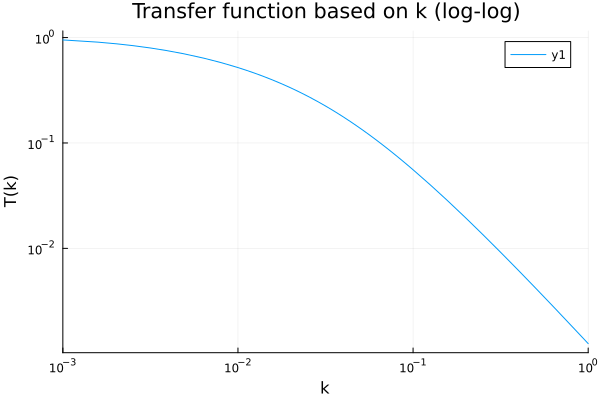

In [9]:
plot(T0, xlims = (0.001, 1.0), xaxis = :log, yaxis = :log, title = "Transfer function based on k (log-log)", xlabel = "k", ylabel = "T(k)")

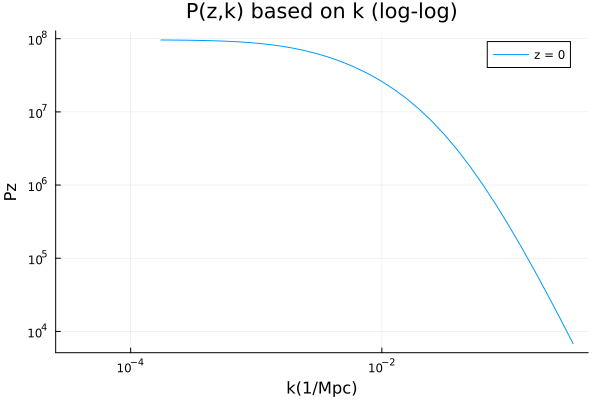

In [40]:
Dz_Arr = []
K_Arr = []
Zs = [0.0]
Zlabels = ["z = 0"]
data_count = 40
kup = 3
kdown = -1
#for i in 1:data_count
#    push!(K_Arr, i * (kup - kdown) / data_count + kdown)
#end
K_Arr = 10 .^ range(kdown, stop = kup, length=data_count)
for z_ref in Zs
    Z_results = []
    for k_ref in K_Arr
        push!(Z_results, nonlocal_delta(k_ref, z_ref))
    end
    push!(Dz_Arr, Z_results)
end
Zlabels = ["z = 0" "z = 0.1" "z = 1" "z = 10" "z = 30"]
K_norm = K_Arr .* H_nonlocal(0) ./ (3 * 10^5) ./ h

Tf_Arr = []
for k in K_norm
    push!(Tf_Arr, T0(k))
end
P_Arr = []
for D in Dz_Arr
    power = (Tf_Arr .^ 2) .* (D .^ 2)
    push!(P_Arr, power)
end
P_Arr = P_Arr .* (4 * pi * (3 * 10^5 / H_nonlocal(0))^4 / Omega_m^2 * A_COBE) #TODO ask about kp
plot(K_norm, P_Arr, label = Zlabels, title = "P(z,k) based on k (log-log)", ylabel = "Pz", xlabel = "k(1/Mpc)", xaxis = :log, yaxis = :log)

In [36]:
(4 * pi * (3 * 10^5 / H_nonlocal(0))^4 / Omega_m^2 )

4.622150466009178e16

In [15]:
df = DataFrame(CSV.File("test_matterpower.csv", delim="   "))

Row,k/h,P
,Float64,Float64
1,0.0001,362.0
2,0.00010202,372.285
3,0.000104081,382.821
4,0.000106184,393.611
5,0.000108329,404.659
6,0.000110517,415.968
7,0.00011275,427.543
8,0.000115027,439.388
9,0.000117351,451.505


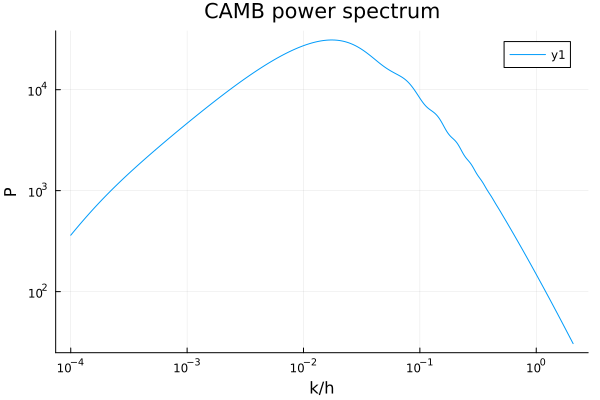

In [21]:
k_h_CAMB = df[:,:"k/h"]
P_CAMB = df[:,:"P"]
plot(k_h_CAMB, P_CAMB, xaxis = :log, yaxis = :log, title = "CAMB power spectrum", xlabel = "k/h", ylabel = "P")

In [8]:
tilde_Omega_mz(z) = Omega_m / (Omega_m + Omega_l * (1 + z) ^ (-3))
function Eulerz(j, D00, D10)
    f1(z, k) = (1 - 1.5 * tilde_Omega_mz(z)) / (1 + z)
    f2(z, k) =  3 / 2 * tilde_Omega_mz(z) * (1 + z)^(-2)
    D2(z, k, D1, D0) = f1(z, k) * D1 + f2(z, k) * D0
    steps = 100 * 10^j
    h =  -1 / 10^j
    D0s = Float64[D00]
    D1s = Float64[D10]
    z = Float64[100]
    for i in 1:Int(steps)
        push!(z,  100 + i * h)
        push!(D1s, D1s[i] + D2(z[i], 0, D1s[i], D0s[i]) * h)
        push!(D0s, D0s[i] + D1s[i] * h)
    end
    D0s = D0s ./ D0s[steps]
    return D0s, z
end

function nonlocal_delta_plot(k_dimless)
    j = 3
    k = k_dimless * H_nonlocal(0)
    steps = 100 * 10^j
    steplen =  -1 / 10^j
    delta_init = 1 / (101)
    deltaprime_init = -1 / (101)^2
    theta_init = (deltaprime_init / H_nonlocal(100) - A1(100, k) * delta_init) / A2(100, k)
    #thetaprime_init = - B1(100, k) * theta_init - B2(100, k) * delta_init
    thetaz = Float64[theta_init]
    #thetaprimez = Float64[thetaprime_init]
    deltaz = Float64[delta_init]
    deltaprimez = Float64[deltaprime_init]
    Z = Float64[100]
    thetaprime(z, k, theta, delta) =  (B1(z, k) * theta + B2(z, k) * delta) / H_nonlocal(z)
    deltaprime(z, k, theta, delta) =  (A1(z, k) * delta + A2(z, k) * theta) / H_nonlocal(z)
    for i in 1:Int(steps)
        push!(Z,  100 + i * steplen)
        push!(deltaz, deltaz[i] + deltaprime(Z[i], k, thetaz[i], deltaz[i]) * steplen)
        push!(thetaz, thetaz[i] + thetaprime(Z[i], k, thetaz[i], deltaz[i]) * steplen)
    end
    deltaz = deltaz ./ deltaz[steps] 
    return deltaz, Z
end

nonlocal_delta_plot (generic function with 1 method)

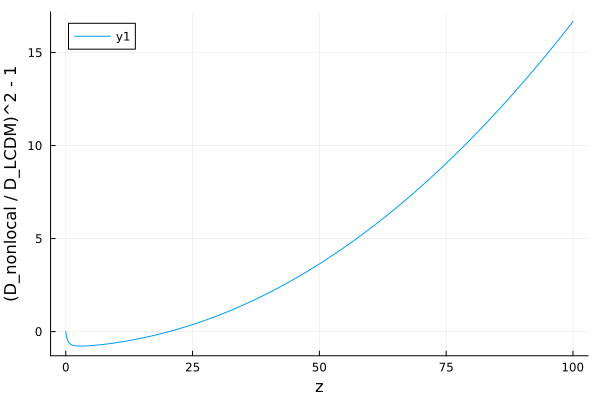

In [9]:
Dz_LCDM, z = Eulerz(3, 1 / 101, -1 / (101)^2)
Dz_nonlocal, z = nonlocal_delta_plot(1000)
ratio = (Dz_nonlocal ./ Dz_LCDM) .^2 .- 1
plot(z, ratio, xaxis = "z", yaxis = "(D_nonlocal / D_LCDM)^2 - 1")